In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

     Modelo     Marca   Preco       Data     Fonte
0   RX 6600    ASRock  1599.9 2025-04-10  terabyte
1   RX 7600      ASUS  1899.9 2025-04-10  terabyte
2  RTX 4070  Gigabyte  4999.9 2025-04-10  terabyte
3  RTX 3060    Inno3D  2149.9 2025-04-10  terabyte
4   RX 7600       XFX  1949.9 2025-04-10  terabyte


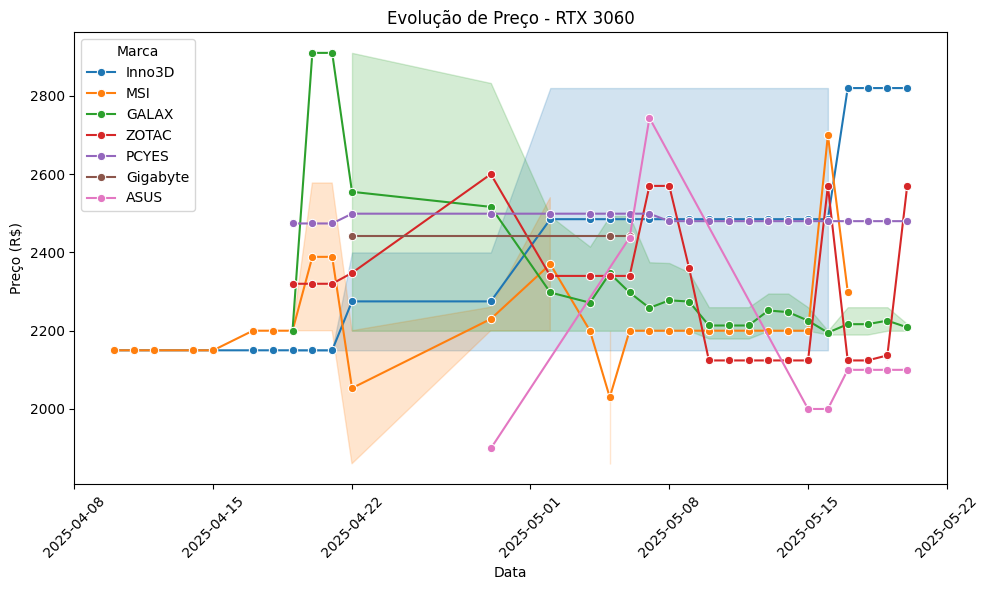

In [2]:
df = pd.read_csv('gpu_data_real.csv', header=None, names=['Modelo', 'Marca', 'Preco', 'Data', 'Fonte'])

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

print(df.head())

modelo_desejado = 'RTX 3060'
df_modelo = df[df['Modelo'] == modelo_desejado]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_modelo, x='Data', y='Preco', hue='Marca', marker='o')
plt.title(f'Evolução de Preço - {modelo_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     Modelo       Data       Preco
0  RTX 3080 2022-11-01  790.000000
1  RTX 3080 2022-12-01  902.142857
2  RTX 3080 2023-01-01  938.444444
3  RTX 3080 2023-02-01  925.750000
4  RTX 3080 2023-03-01  880.733333


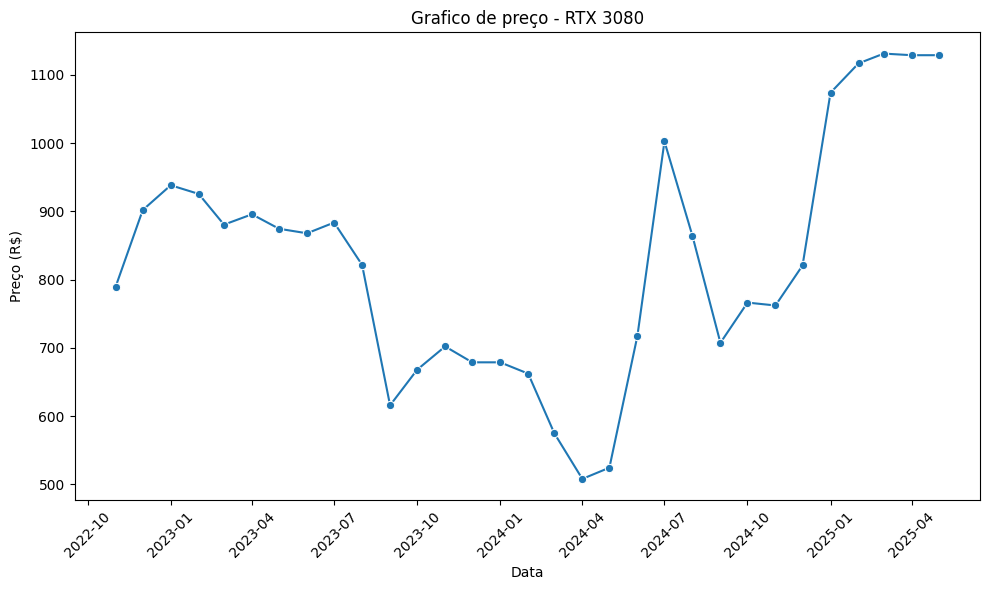

In [3]:
df = pd.read_csv('3080_data.csv', header=None, names=['Modelo', 'Data', 'Preco'])

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

print(df.head())

modelo_desejado = 'RTX 3080'
df_modelo = df[df['Modelo'] == modelo_desejado]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_modelo, x='Data', y='Preco', marker='o')
plt.title(f'Grafico de preço - {modelo_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Arquivos encontrados: ['3060_data.csv', '3080_data.csv', '3070-ti_data.csv', '3070_data.csv', 'gpu_data.csv']

--- Amostra do DataFrame Combinado ---
     Modelo       Data       Preco
0  RTX 3060 2022-11-01  367.000000
1  RTX 3060 2022-12-01  361.285714
2  RTX 3060 2023-01-01  361.777778
3  RTX 3060 2023-02-01  332.428571
4  RTX 3060 2023-03-01  347.133333

Modelos encontrados no DataFrame:
['RTX 3060' 'RTX 3080' '3070-ti' 3070]


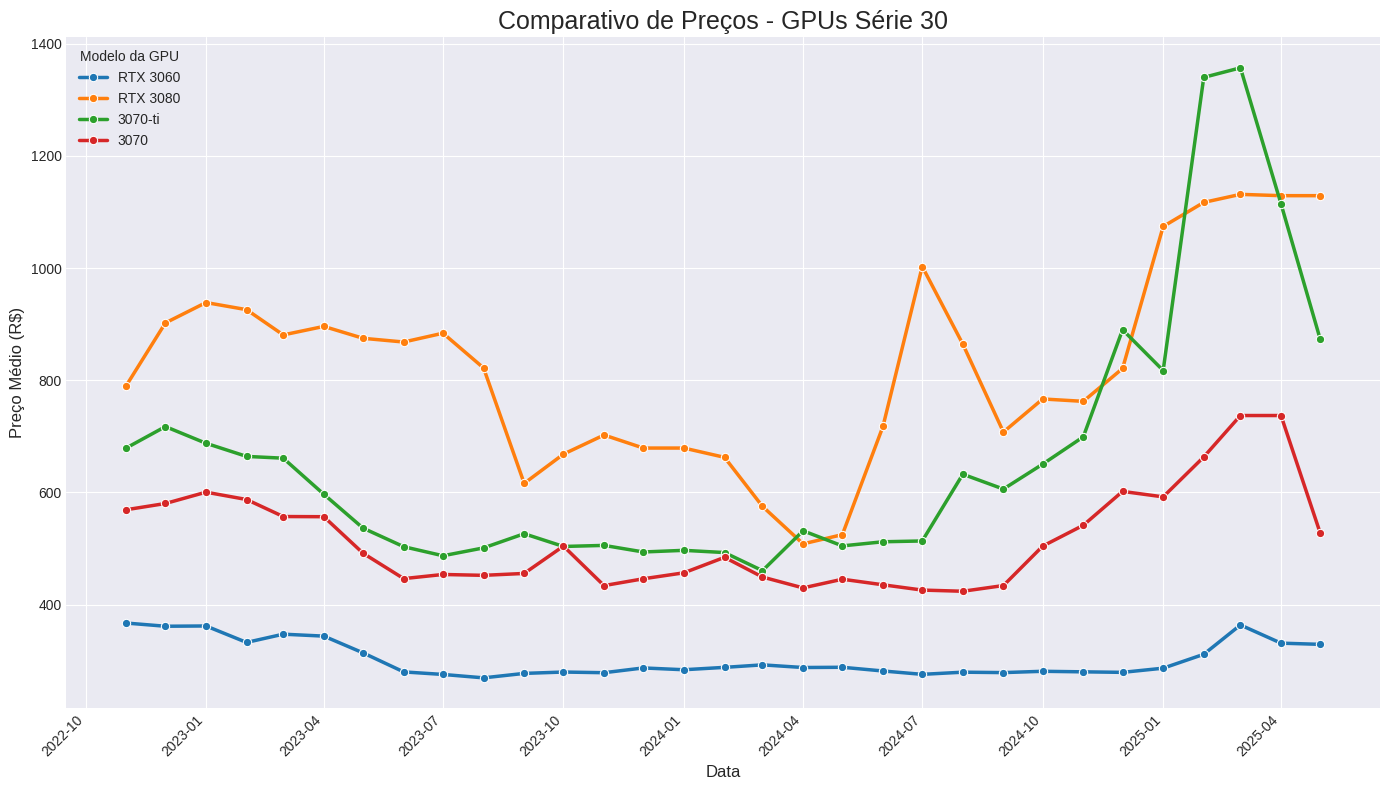

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 1. Encontrar todos os arquivos CSV que terminam com '_data.csv'
# Isso torna o código flexível para adicionar mais placas no futuro
arquivos_csv = glob.glob('*_data.csv')
print(f"Arquivos encontrados: {arquivos_csv}")

# 2. Ler cada CSV e guardá-lo em uma lista de DataFrames
lista_de_dataframes = []
for arquivo in arquivos_csv:
    df_temp = pd.read_csv(arquivo, header=None, names=['Modelo', 'Data', 'Preco'])
    lista_de_dataframes.append(df_temp)

# 3. Juntar todos os DataFrames da lista em um só
df_completo = pd.concat(lista_de_dataframes, ignore_index=True)

# 4. Limpar e preparar os dados (como você já fazia)
df_completo['Data'] = pd.to_datetime(df_completo['Data'], errors='coerce')
df_completo['Preco'] = pd.to_numeric(df_completo['Preco'], errors='coerce')

# Remover linhas que possam ter tido erro na conversão
df_completo.dropna(inplace=True)

print("\n--- Amostra do DataFrame Combinado ---")
print(df_completo.head())
print("\nModelos encontrados no DataFrame:")
print(df_completo['Modelo'].unique())


# 5. Criar o gráfico com todas as linhas
plt.style.use('seaborn-v0_8-darkgrid') # Usando um estilo escuro
plt.figure(figsize=(14, 8)) # Aumentei o tamanho para melhor visualização

# A "mágica" acontece aqui com o parâmetro 'hue'
sns.lineplot(
    data=df_completo,
    x='Data',
    y='Preco',
    hue='Modelo',  # Cria uma linha para cada 'Modelo'
    marker='o',      # Adiciona um marcador a cada ponto de dado
    linewidth=2.5    # Linhas um pouco mais grossas
)

# 6. Melhorar o visual do gráfico
plt.title('Comparativo de Preços - GPUs Série 30', fontsize=18)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modelo da GPU') # Melhora a legenda
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()